In [ ]:
#سوال اول
#پیش بینی شود که ایا شخص دوره 14 روزه این شرکت را پاس میکند یا خیر؟
#پیش بینی شود کسی که دوره 14 روزه را پاس کرده است ایا استخدام شده است یا خیر؟

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel("Data_Pathrise.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [4]:
#y : درصد متغیر نسبت به تعداد کل null ها 
# درصد متغیر نسبت به کل دیتا
def percents(x,y):
    a = x/y*100
    return a

In [5]:
df.drop(["id","cohort_tag"],axis=1,inplace=True)

In [6]:
df['program_duration_days'].replace(np.nan,0,inplace=True)

In [7]:
df['highest_level_of_education'].replace(np.nan,"Bachelor's Degree",inplace=True)

In [8]:
df['biggest_challenge_in_search'].replace(np.nan,"Hearing back on my applications",inplace=True)

In [9]:
df['work_authorization_status'].replace(np.nan,"Citizen",inplace=True)

In [10]:
df.drop(df.loc[(df['pathrise_status']=='Placed') & (df['program_duration_days'] < 14)].index,inplace=True)

In [11]:
df.drop(df.loc[(df['pathrise_status']=='Withdrawn') & (df['program_duration_days'] < 14)].index,inplace=True)

In [12]:
df['pathrise_status'].replace(['Withdrawn (Trial)','Closed Lost','MIA','Deferred','Break','Active'],"0",inplace=True)

In [13]:
df['pathrise_status'].replace(['Withdrawn','Withdrawn','Withdrawn (Failed)','Withdrawn (Trial)','Placed'],"1",inplace=True)

In [320]:
#####
#تا اینجا اوکی شده
####

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2504 non-null   object 
 1   primary_track                2504 non-null   object 
 2   program_duration_days        2504 non-null   float64
 3   placed                       2504 non-null   int64  
 4   employment_status            2281 non-null   object 
 5   highest_level_of_education   2504 non-null   object 
 6   length_of_job_search         2431 non-null   object 
 7   biggest_challenge_in_search  2504 non-null   object 
 8   professional_experience      2284 non-null   object 
 9   work_authorization_status    2504 non-null   object 
 10  number_of_interviews         2293 non-null   float64
 11  number_of_applications       2504 non-null   int64  
 12  gender                       2022 non-null   object 
 13  race              

In [15]:
df['length_of_job_search'].replace(np.nan,"1-2 months",inplace=True)

In [16]:
df['work_authorization_status'][(df['program_duration_days'] > 14)].replace(np.nan,"Citizen",inplace=True)

In [17]:
df['number_of_interviews'].replace(np.nan,2,inplace=True)

In [18]:
df['race'].replace(np.nan,"East Asian or Asian American",inplace=True)

In [398]:
#df['employment_status '].value_counts()

In [399]:
#df['professional_experience'].value_counts()

In [400]:
#df['professional_experience'].value_counts()

In [19]:
nEmpty = df['professional_experience'].isnull().sum()

In [20]:
#1-2 years
n1 = (percents(882,2322)*nEmpty)/100
n1

83.56589147286823

In [22]:
#Less than one year
n2 = (percents(618,2322)*nEmpty)/100
n2

58.55297157622739

In [23]:
#3-4 years
n3 = (percents(558,2322)*nEmpty)/100
n3

52.86821705426357

In [24]:
#5+ years
n4 = (percents(264,2322)*nEmpty)/100
n4

25.012919896640824

In [25]:
#define filling function for professional_experience missing value


Professional_experience = []
def fillNull(n1,n2,n3,n4,lI):
    j = 0
    for i in lI:
        if i is np.nan:
            if j <= n1:
               Professional_experience.append('1-2 years')
            elif n1< j <= n1+n2:
                Professional_experience.append('Less than one year')
            elif n1+n2 < j <= n1+n2+n3:
                Professional_experience.append('3-4 years')
            elif n1+n2+n3 < j <= n1+n2+n3+n4+1:
                Professional_experience.append('5+ years')
            j += 1
        else:
            Professional_experience.append(i)
            
fillNull(n1,n2,n3,n4,df['professional_experience'])
    

In [26]:
len(Professional_experience)

2504

In [27]:
data = df

In [28]:
idx = 0
new_col = Professional_experience  
data.insert(loc=idx, column='Professional_experience', value=new_col)

In [29]:
df['employment_status '].value_counts()

Student               759
Unemployed            654
Employed Full-Time    431
Employed Part-Time    269
Contractor            168
Name: employment_status , dtype: int64

In [30]:
nEmpty_employment_status = df['employment_status '].isnull().sum()

In [31]:
#student
s1 = int((percents(775,2315)*nEmpty_employment_status)/100)
s1

74

In [32]:
#Unemployed
s2 = int((percents(665,2315)*nEmpty_employment_status)/100)
s2

64

In [33]:
#Employed Full-Time
s3 = int((percents(435,2315)*nEmpty_employment_status)/100)
s3

41

In [34]:
#Employed Part-Time
s4 = int((percents(270,2315)*nEmpty_employment_status)/100)
s4

26

In [36]:
#Contractor
s5 = int((percents(170,2315)*nEmpty_employment_status)/100)
s5

16

In [37]:
#define filling function for employment_status missing value


new_employment_status = []
def fillNull2(s1,s2,s3,s4,s5,lI2):
    j1 = 0
    for i1 in lI2:
        if i1 is np.nan:
            if j1 <= s1:
               new_employment_status.append('student')
            elif s1< j1 <= s1+s2:
                new_employment_status.append('Unemployed')
            elif s1+s2 < j1 <= s1+s2+s3:
                new_employment_status.append('Employed Full-Time')
            elif s1+s2+s3 < j1 <= s1+s2+s3+s4:
                new_employment_status.append('Employed Part-Time')
            elif s1+s2+s3+s4 <j1 < s1+s2+s3+s4+s5+3:
                new_employment_status.append('Contractor')
            j1 += 1
        else:
            new_employment_status.append(i1)
            
fillNull2(s1,s2,s3,s4,s5,df['employment_status '])

In [39]:
df.drop('employment_status ',axis=1,inplace=True)

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Professional_experience      2504 non-null   object 
 1   pathrise_status              2504 non-null   object 
 2   primary_track                2504 non-null   object 
 3   program_duration_days        2504 non-null   float64
 4   placed                       2504 non-null   int64  
 5   highest_level_of_education   2504 non-null   object 
 6   length_of_job_search         2504 non-null   object 
 7   biggest_challenge_in_search  2504 non-null   object 
 8   professional_experience      2284 non-null   object 
 9   work_authorization_status    2504 non-null   object 
 10  number_of_interviews         2504 non-null   float64
 11  number_of_applications       2504 non-null   int64  
 12  gender                       2022 non-null   object 
 13  race              

In [41]:
df.drop(['Professional_experience','professional_experience'],axis=1,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2504 non-null   object 
 1   primary_track                2504 non-null   object 
 2   program_duration_days        2504 non-null   float64
 3   placed                       2504 non-null   int64  
 4   highest_level_of_education   2504 non-null   object 
 5   length_of_job_search         2504 non-null   object 
 6   biggest_challenge_in_search  2504 non-null   object 
 7   work_authorization_status    2504 non-null   object 
 8   number_of_interviews         2504 non-null   float64
 9   number_of_applications       2504 non-null   int64  
 10  gender                       2022 non-null   object 
 11  race                         2504 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 254.3+ KB


In [44]:
df.insert(loc=5, column='professional_experience', value=Professional_experience)

In [45]:
df.insert(loc=5, column='employment_status', value=new_employment_status)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2504 non-null   object 
 1   primary_track                2504 non-null   object 
 2   program_duration_days        2504 non-null   float64
 3   placed                       2504 non-null   int64  
 4   highest_level_of_education   2504 non-null   object 
 5   employment_status            2504 non-null   object 
 6   professional_experience      2504 non-null   object 
 7   length_of_job_search         2504 non-null   object 
 8   biggest_challenge_in_search  2504 non-null   object 
 9   work_authorization_status    2504 non-null   object 
 10  number_of_interviews         2504 non-null   float64
 11  number_of_applications       2504 non-null   int64  
 12  gender                       2022 non-null   object 
 13  race              

In [47]:
var=df['gender'].isnull().sum()

In [48]:
#Male
NM = (percents(1492,2052 )*var)/100
#Female 
NF = (percents(538,2052 )*var)/100
#Decline to Self Identify  
NDL = (percents(16,2052 )*var)/100
#Non-Binary
NNB = (percents(6,2052 )*var)/100

In [49]:


#define filling function for Gendar missing value


Gendar = []
def fillNull(NM,NF,NDL,NNB,lI):
    j = 0
    for i in lI:
        if i is np.nan:
            if j <= NM:
               Gendar.append('Male')
            elif NM< j <= NM+NF:
                Gendar.append('Female')
            elif NM+NF < j <= NM+NF+NDL:
                Gendar.append('Decline to Self Identify')
            elif NM+NF+NDL < j <= NM+NF+NDL+NNB+1:
                Gendar.append('Non-Binary')
            j += 1
        else:
            Gendar.append(i)
            
fillNull(NM,NF,NDL,NNB,df['gender'])


In [50]:
df.drop('gender',axis=1,inplace=True)

In [51]:
df.insert(loc=5, column='gender', value=Gendar)

In [52]:
len(Gendar)

2504

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2504 non-null   object 
 1   primary_track                2504 non-null   object 
 2   program_duration_days        2504 non-null   float64
 3   placed                       2504 non-null   int64  
 4   highest_level_of_education   2504 non-null   object 
 5   gender                       2504 non-null   object 
 6   employment_status            2504 non-null   object 
 7   professional_experience      2504 non-null   object 
 8   length_of_job_search         2504 non-null   object 
 9   biggest_challenge_in_search  2504 non-null   object 
 10  work_authorization_status    2504 non-null   object 
 11  number_of_interviews         2504 non-null   float64
 12  number_of_applications       2504 non-null   int64  
 13  race              

In [54]:
df.columns

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'highest_level_of_education', 'gender', 'employment_status',
       'professional_experience', 'length_of_job_search',
       'biggest_challenge_in_search', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'race'],
      dtype='object')

In [55]:
#pathrise_status_d = pd.get_dummies(df['pathrise_status'],drop_first=True)
highest_level_of_education_d = pd.get_dummies(df['highest_level_of_education'],drop_first=True)
length_of_job_search_d = pd.get_dummies(df['length_of_job_search'],drop_first=True)
gender_d = pd.get_dummies(df['gender'],drop_first=True)
employment_status_d = pd.get_dummies(df['employment_status'],drop_first=True)
professional_experience_d = pd.get_dummies(df['professional_experience'],drop_first=True)
biggest_challenge_in_search_d = pd.get_dummies(df['biggest_challenge_in_search'],drop_first=True)
work_authorization_status_d = pd.get_dummies(df['work_authorization_status'],drop_first=True)
race_d = pd.get_dummies(df['race'],drop_first=True)
primary_track = pd.get_dummies(df['primary_track'],drop_first=True)

df.drop(["primary_track","highest_level_of_education","length_of_job_search","gender","employment_status","professional_experience","biggest_challenge_in_search","work_authorization_status","race"],axis=1,inplace=True)
#pd.concat([])

In [57]:
df = pd.concat([df, primary_track,highest_level_of_education_d,length_of_job_search_d,gender_d,employment_status_d,professional_experience_d,biggest_challenge_in_search_d,work_authorization_status_d,race_d],axis=1)

In [58]:
#df.drop('primary_track',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   pathrise_status                       2504 non-null   object 
 1   program_duration_days                 2504 non-null   float64
 2   placed                                2504 non-null   int64  
 3   number_of_interviews                  2504 non-null   float64
 4   number_of_applications                2504 non-null   int64  
 5   Design                                2504 non-null   uint8  
 6   Marketing                             2504 non-null   uint8  
 7   PSO                                   2504 non-null   uint8  
 8   SWE                                   2504 non-null   uint8  
 9   Web                                   2504 non-null   uint8  
 10  Doctorate or Professional Degree      2504 non-null   uint8  
 11  GED or equivalent

In [61]:
#df.rename(columns = {'placed':'placed_target'}, inplace = True)

df.to_csv("pathrise_new.csv")

In [62]:
#pathrise_status_d
race_d 

,Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2539,0,0,0,0,0,1,0,0
2540,0,0,0,0,0,1,0,0
2541,0,0,0,0,0,1,0,0
2542,1,0,0,0,0,0,0,0


In [63]:
df_new = df.drop('placed',axis=1)

In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2543
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   pathrise_status                       2504 non-null   object 
 1   program_duration_days                 2504 non-null   float64
 2   number_of_interviews                  2504 non-null   float64
 3   number_of_applications                2504 non-null   int64  
 4   Design                                2504 non-null   uint8  
 5   Marketing                             2504 non-null   uint8  
 6   PSO                                   2504 non-null   uint8  
 7   SWE                                   2504 non-null   uint8  
 8   Web                                   2504 non-null   uint8  
 9   Doctorate or Professional Degree      2504 non-null   uint8  
 10  GED or equivalent                     2504 non-null   uint8  
 11  High School Gradu

In [65]:
from sklearn.model_selection import train_test_split

In [68]:
X = df_new.drop('pathrise_status',axis=1)
y = df_new['pathrise_status']
#y=y.astype("float")
#type(y)
#type(y[0])
#df.columns
#df = df.apply(pd.to_numeric,downcast='float')
#df = df.astype(np.float64)
X

,program_duration_days,number_of_interviews,number_of_applications,Design,Marketing,PSO,SWE,Web,Doctorate or Professional Degree,GED or equivalent,...,Other,STEM OPT,Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
0,0.0,2.0,900,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,6.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.0,5.0,25,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,89.0,10.0,100,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,457.0,4.0,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2540,488.0,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2541,0.0,1.0,30,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,0.0,2.0,10,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [70]:
scaled_features = preprocessing.normalize(X, axis=1)

In [ ]:
#scaler = StandardScaler()

In [ ]:
#scaler.fit(df.drop('placed_target',axis=1))

In [ ]:
#scaled_features = scaler.transform(df.drop('placed_target',axis=1))

In [ ]:
#df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
#df_feat.head()

In [72]:
X = scaled_features
y = df_new['pathrise_status']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=101)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree = DecisionTreeClassifier()

In [78]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
predictions = dtree.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       335
           1       1.00      0.98      0.99       417

    accuracy                           0.98       752
   macro avg       0.98      0.99      0.98       752
weighted avg       0.98      0.98      0.98       752



In [82]:
print(confusion_matrix(y_test,predictions))

[[333   2]
 [ 10 407]]


In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
rfc_pred = rfc.predict(X_test)

In [85]:
print(confusion_matrix(y_test,rfc_pred))

[[335   0]
 [ 12 405]]


In [86]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       335
           1       1.00      0.97      0.99       417

    accuracy                           0.98       752
   macro avg       0.98      0.99      0.98       752
weighted avg       0.98      0.98      0.98       752



In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [89]:
predictions = logmodel.predict(X_test)

In [90]:
confusion_matrix(y_test,predictions)

array([[318,  17],
       [ 17, 400]], dtype=int64)

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       335
           1       0.96      0.96      0.96       417

    accuracy                           0.95       752
   macro avg       0.95      0.95      0.95       752
weighted avg       0.95      0.95      0.95       752



In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=1)

In [94]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [95]:
pred = knn.predict(X_test)

In [96]:
print(confusion_matrix(y_test,pred))

[[305  30]
 [  1 416]]


In [97]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       335
           1       0.93      1.00      0.96       417

    accuracy                           0.96       752
   macro avg       0.96      0.95      0.96       752
weighted avg       0.96      0.96      0.96       752



In [ ]:
############ END Target 1 ###############

In [ ]:
############ START Target 2 ###############

In [164]:
data = pd.read_csv("pathrise_new.csv")

In [165]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [166]:
data

,pathrise_status,program_duration_days,placed,number_of_interviews,number_of_applications,Design,Marketing,PSO,SWE,Web,...,Other,STEM OPT,Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
0,0,0.0,0,2.0,900,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,6.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.0,0,5.0,25,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,89.0,1,10.0,100,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,1,457.0,0,4.0,15,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2500,1,488.0,0,1.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2501,0,0.0,0,1.0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2502,0,0.0,0,2.0,10,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [170]:
data_new = data[data['pathrise_status']==1]
data_new

,pathrise_status,program_duration_days,placed,number_of_interviews,number_of_applications,Design,Marketing,PSO,SWE,Web,...,Other,STEM OPT,Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
4,1,89.0,1,10.0,100,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,1,19.0,0,4.0,15,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
11,1,158.0,0,5.0,50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,1,52.0,0,4.0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22,1,93.0,0,1.0,10,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1,119.0,1,0.0,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2498,1,118.0,0,1.0,25,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2499,1,457.0,0,4.0,15,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2500,1,488.0,0,1.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [171]:
X_D = data_new.drop('placed',axis=1)
y_D = data_new['placed']

In [172]:
scaled_features_X = preprocessing.normalize(X_D, axis=1)

In [173]:
X_D = scaled_features_X

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_D, y_D, test_size=0.30 , random_state=101)

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
dtree = DecisionTreeClassifier()

In [177]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [178]:
predictions = dtree.predict(X_test)

In [179]:
from sklearn.metrics import classification_report,confusion_matrix

In [180]:
print(confusion_matrix(y_test,predictions))

[[ 51  77]
 [ 93 198]]


In [181]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.35      0.40      0.37       128
           1       0.72      0.68      0.70       291

    accuracy                           0.59       419
   macro avg       0.54      0.54      0.54       419
weighted avg       0.61      0.59      0.60       419



In [182]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [183]:
rfc_pred = rfc.predict(X_test)

In [184]:
print(confusion_matrix(y_test,rfc_pred))

[[ 36  92]
 [ 31 260]]


In [185]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       128
           1       0.74      0.89      0.81       291

    accuracy                           0.71       419
   macro avg       0.64      0.59      0.59       419
weighted avg       0.68      0.71      0.67       419



In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [199]:
predictions = logmodel.predict(X_test)

In [200]:
confusion_matrix(y_test,predictions)

array([[  0, 128],
       [  0, 291]], dtype=int64)

In [201]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.69      1.00      0.82       291

    accuracy                           0.69       419
   macro avg       0.35      0.50      0.41       419
weighted avg       0.48      0.69      0.57       419



E:\Program Files\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Program Files\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Program Files\python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
knn = KNeighborsClassifier(n_neighbors=1)

In [195]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [196]:
pred = knn.predict(X_test)

In [197]:
print(confusion_matrix(y_test,pred))

[[ 57  71]
 [ 96 195]]


In [198]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.37      0.45      0.41       128
           1       0.73      0.67      0.70       291

    accuracy                           0.60       419
   macro avg       0.55      0.56      0.55       419
weighted avg       0.62      0.60      0.61       419



In [ ]:
############ END Target 2 ###############

In [ ]:
################## Visualation #####################

In [98]:
sns.catplot(y="gender", x="highest_level_of_education", hue="placed", data=df, aspect = 5)
plt.xlabel("highest_level_of_education",fontsize=20)
plt.ylabel("placed",fontsize=20)
plt.show()

ValueError: Could not interpret input 'highest_level_of_education'

In [99]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.countplot(x="highest_level_of_education", hue="placed", data=df)
#plt.xlabel("highest_level_of_education",fontsize=20)
#plt.ylabel("placed",fontsize=20)
plt.show()

ValueError: Could not interpret input 'highest_level_of_education'

In [ ]:
df['highest_level_of_education'][df['placed']==1].value_counts()

In [ ]:
df['highest_level_of_education'].value_counts()

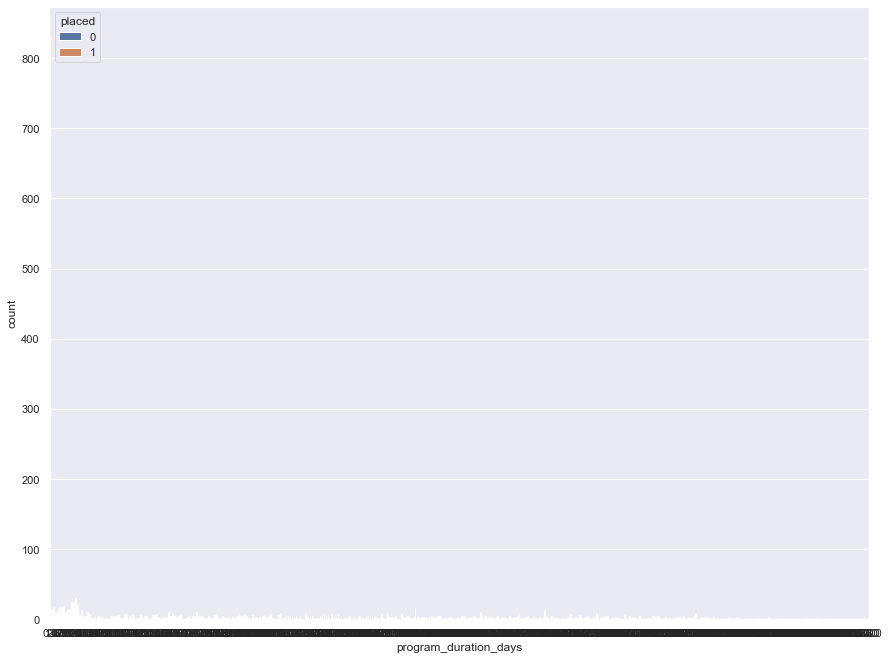

In [136]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.countplot(x="program_duration_days", hue="placed", data=df)
#plt.xlabel("highest_level_of_education",fontsize=20)
#plt.ylabel("placed",fontsize=20)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.countplot(x="gender", hue="placed", data=df)
#plt.xlabel("highest_level_of_education",fontsize=20)
#plt.ylabel("placed",fontsize=20)
plt.show()

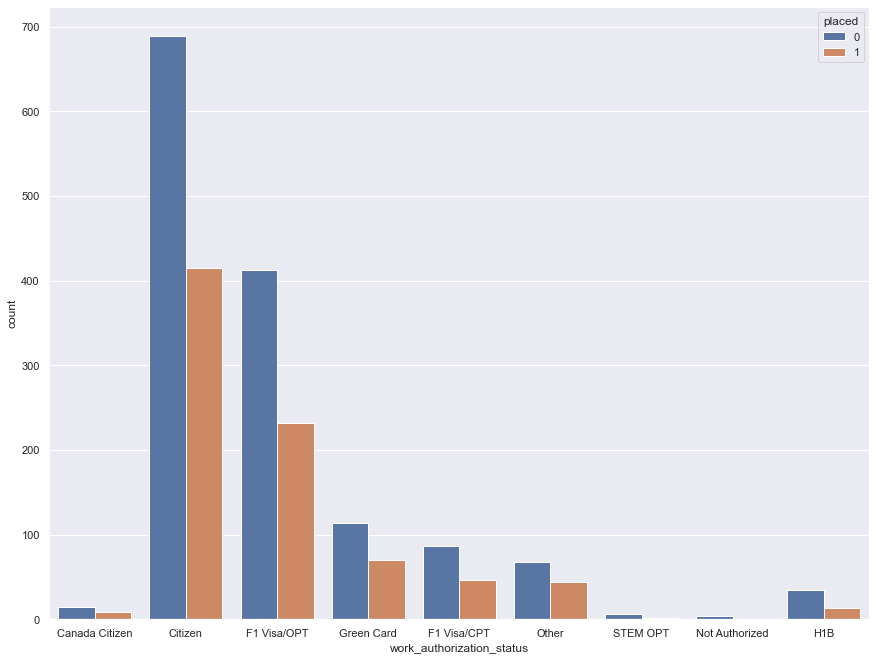

In [137]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.countplot(x="work_authorization_status", hue="placed", data=df)
#plt.xlabel("highest_level_of_education",fontsize=20)
#plt.ylabel("placed",fontsize=20)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.countplot(x="employment_status", hue="placed", data=df)
#plt.xlabel("highest_level_of_education",fontsize=20)
#plt.ylabel("placed",fontsize=20)
plt.show()

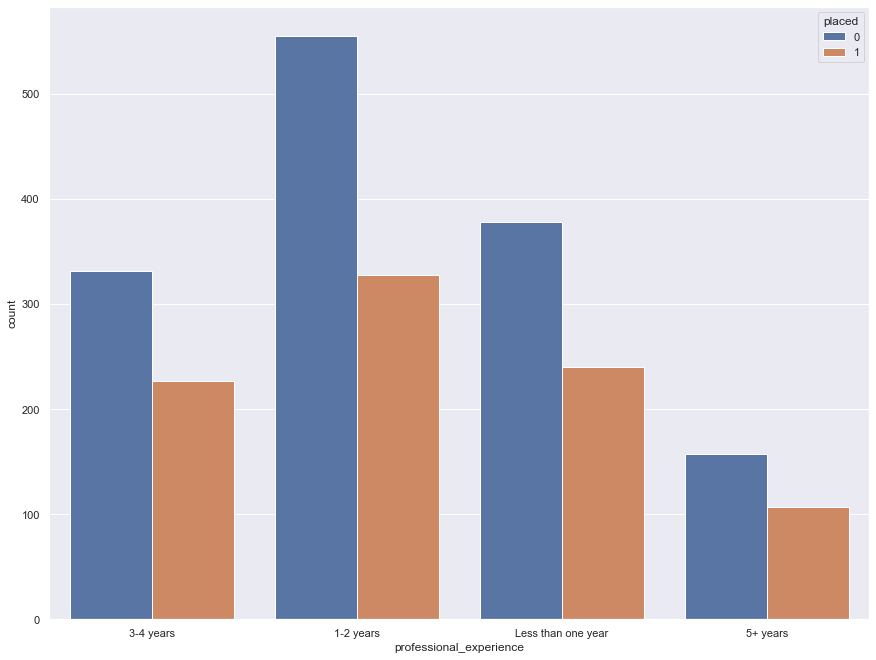

In [138]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.countplot(x="professional_experience", hue="placed", data=df)
#plt.xlabel("highest_level_of_education",fontsize=20)
#plt.ylabel("placed",fontsize=20)
plt.show()

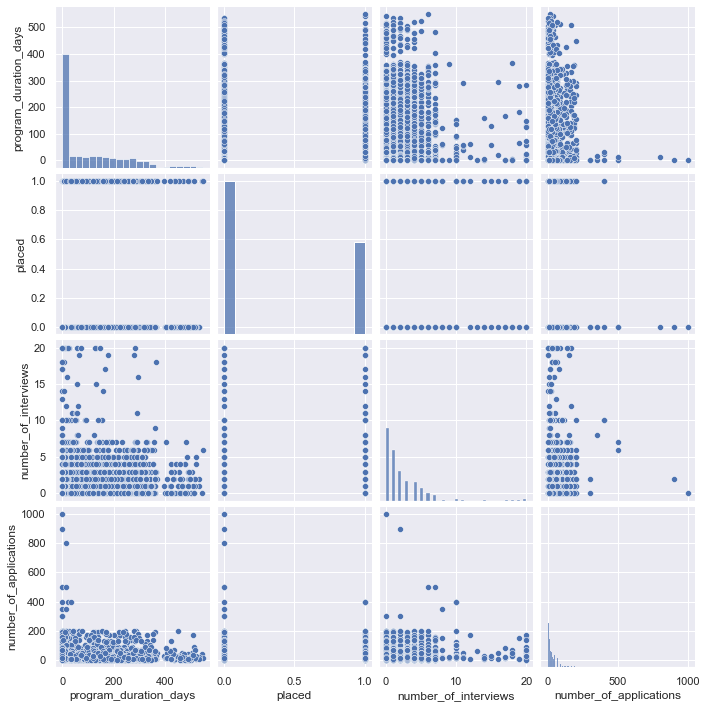

In [139]:
sns.pairplot(df)

In [140]:
#note:for more that one coloum keep ading in the list 
dummies = pd.get_dummies(df[['column_1', 'column_2','column_3']], drop_first=True)
df = pd.concat([df.drop(['column_1', 'column_1'],axis=1), dummies],axis=1)

KeyError: "None of [Index(['column_1', 'column_2', 'column_3'], dtype='object')] are in the [columns]"